# Support Vector Regression

An SVR is plotted like a Linear Regression only, except that there is an area parallel to the line equally on both sides considered to neglect errors.
The points outside this area are the ones that gives us the line and are called support vectors ***(ξ)***.
The tube around the line is ***ϵ*** on both side parallel to y axis and the points outside are denoted by ξ above the line
and ξ* below the line

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [5]:
print(sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))[0])

170370.02040650236


## Visualising the SVR results

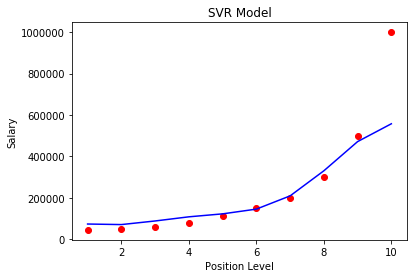

In [6]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')					
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('SVR Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

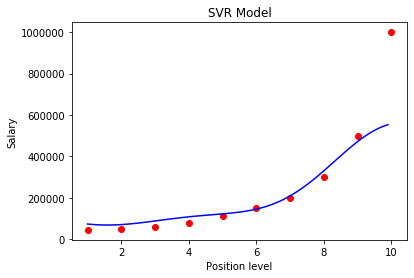

In [7]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('SVR Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()